<a href="https://colab.research.google.com/github/Pruthiviraj2121/Data_Analysis_DiwaliSales/blob/main/Diwali_sales_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pplt #visualizing data
#this displays matplots directly on the output
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
#to avoid coding error use uicode_escape

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# as per above status and unnamed are in blank state
df.drop(['Status','unnamed1'],axis=1,inplace=True)
#inplace=True defines to save all the process that happened

In [ ]:
#to calculate the null values in the dataset
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
#to drop the null values in the dataset use dropna
df.dropna(inplace=True)

In [ ]:
#to change the datatype of a data in a dataset
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes #to check the datatype use dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#to rename the column or row name
df.rename(columns= {'Marital_Status' : 'Shaadi'}) #and to save the name ue 'inplace=True'

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
# describe() method returns description of the data in the DataFrame(i.e. count, mean, std, etc)
df.describe()
#and to describe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Exploratory Data Analysis**

<Axes: xlabel='Gender', ylabel='count'>

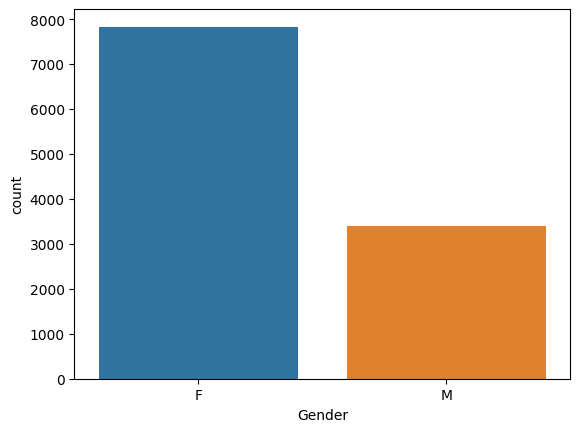

In [ ]:
sns.countplot(x = 'Gender', data= df)

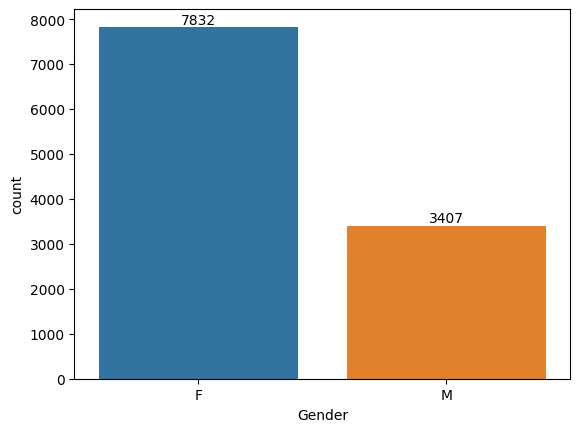

In [ ]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
#groupingBy the values of male and female
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

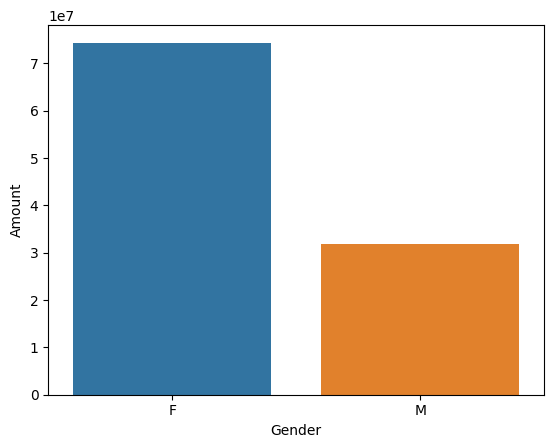

In [ ]:
#to see the values in a graph
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

From above graph we can see that most of the buyers are females and even the purchasing power of the females are greater than men

**Age**

<Axes: xlabel='Age Group', ylabel='count'>

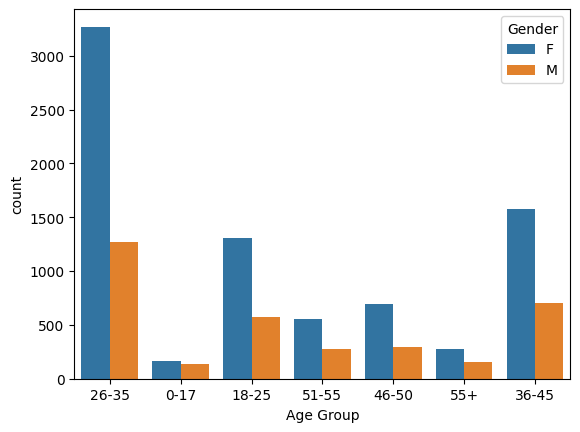

In [ ]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

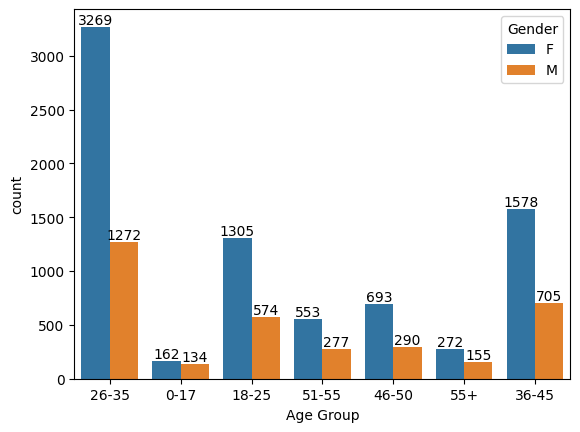

In [ ]:
# to get values in the graph
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

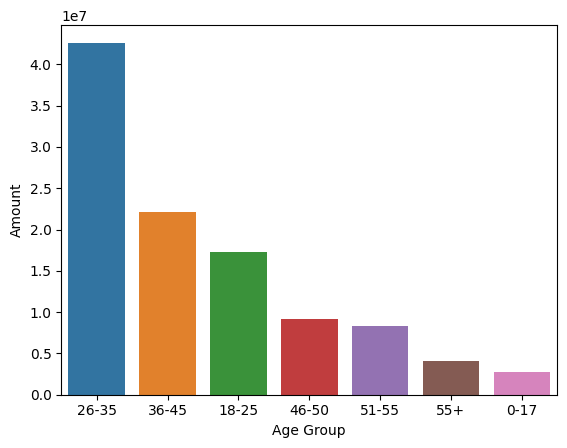

In [ ]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data= sales_age)

**State**

<Axes: xlabel='State', ylabel='Orders'>

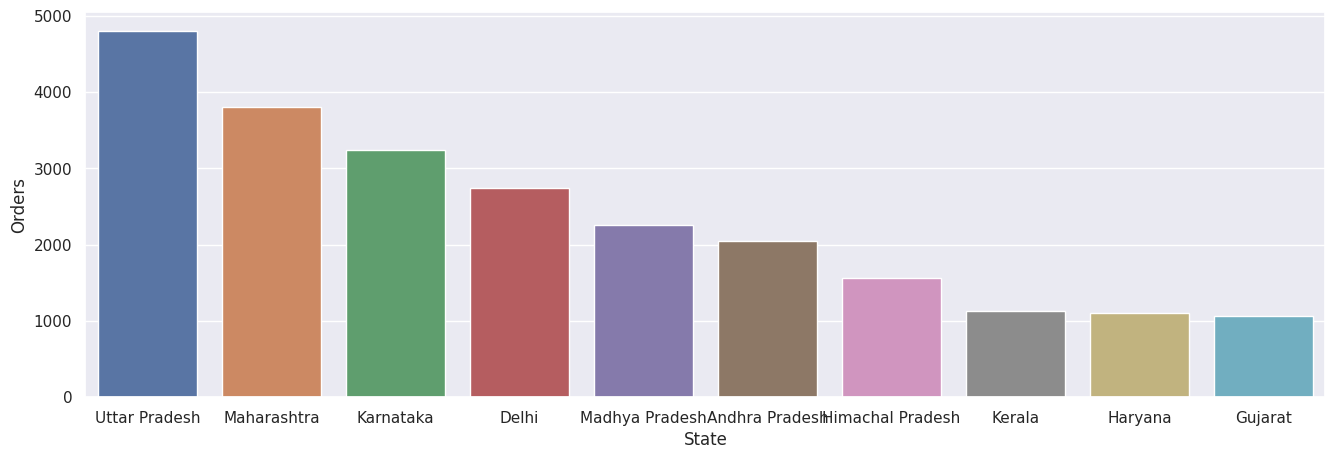

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

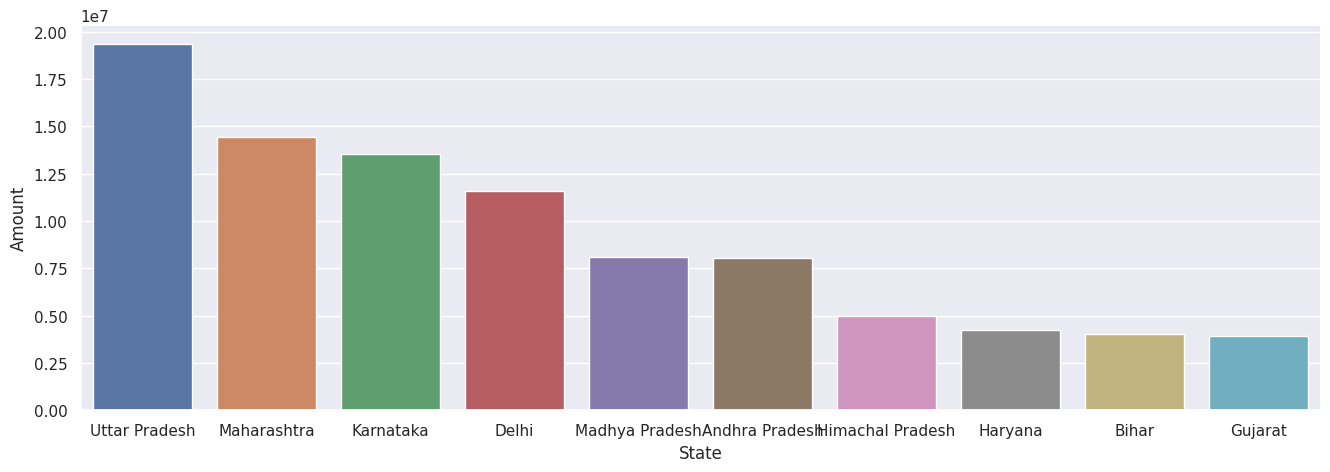

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

**Marital Status**

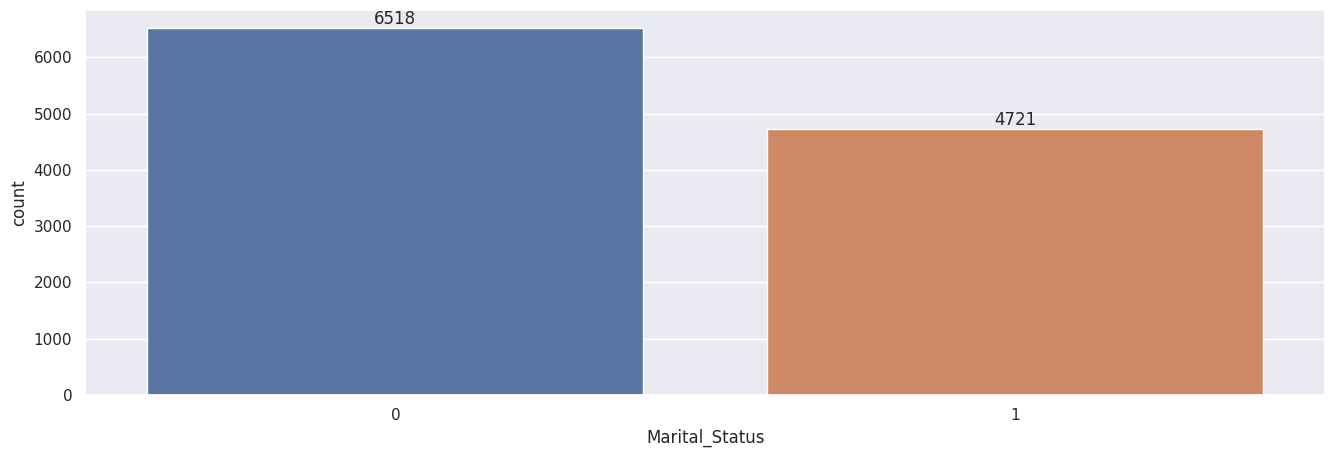

In [ ]:
ax = sns.countplot(x = 'Marital_Status', data=df)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

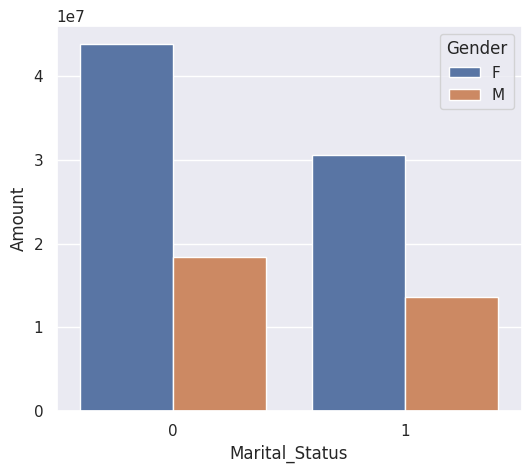

In [ ]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_state, hue= 'Gender')

**Occupation**

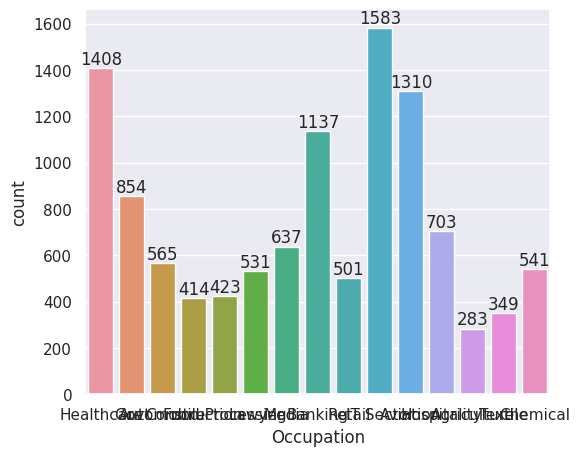

In [ ]:
ax = sns.countplot(x = 'Occupation', data = df)

sns.set(rc={'figure.figsize': (20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

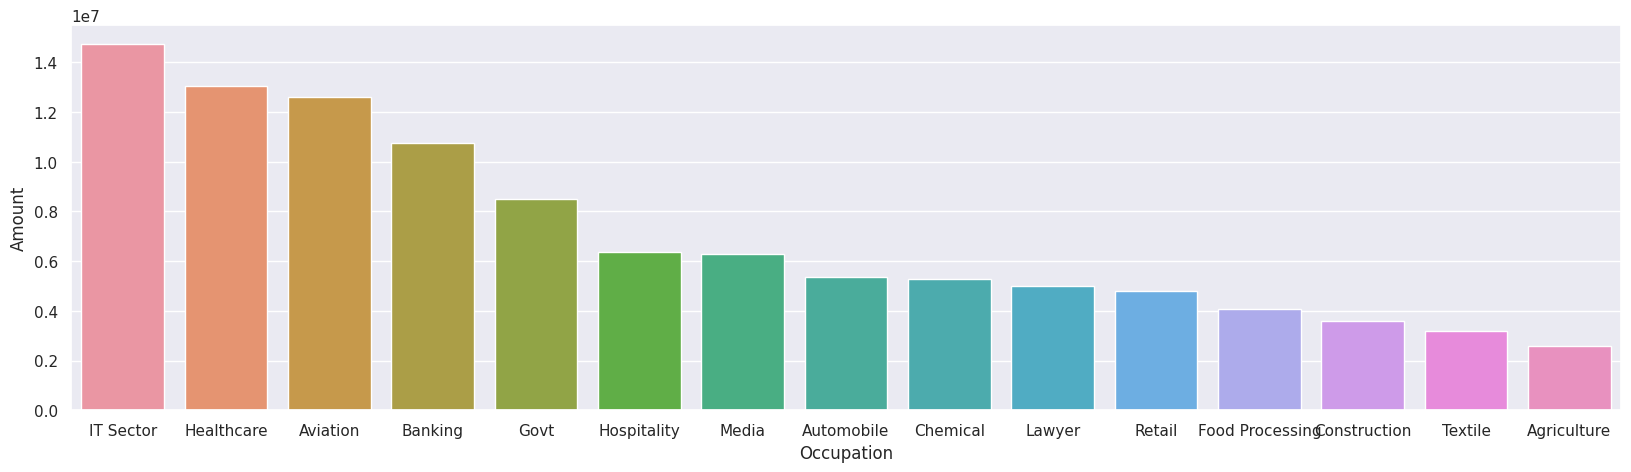

In [ ]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

**Product Category**

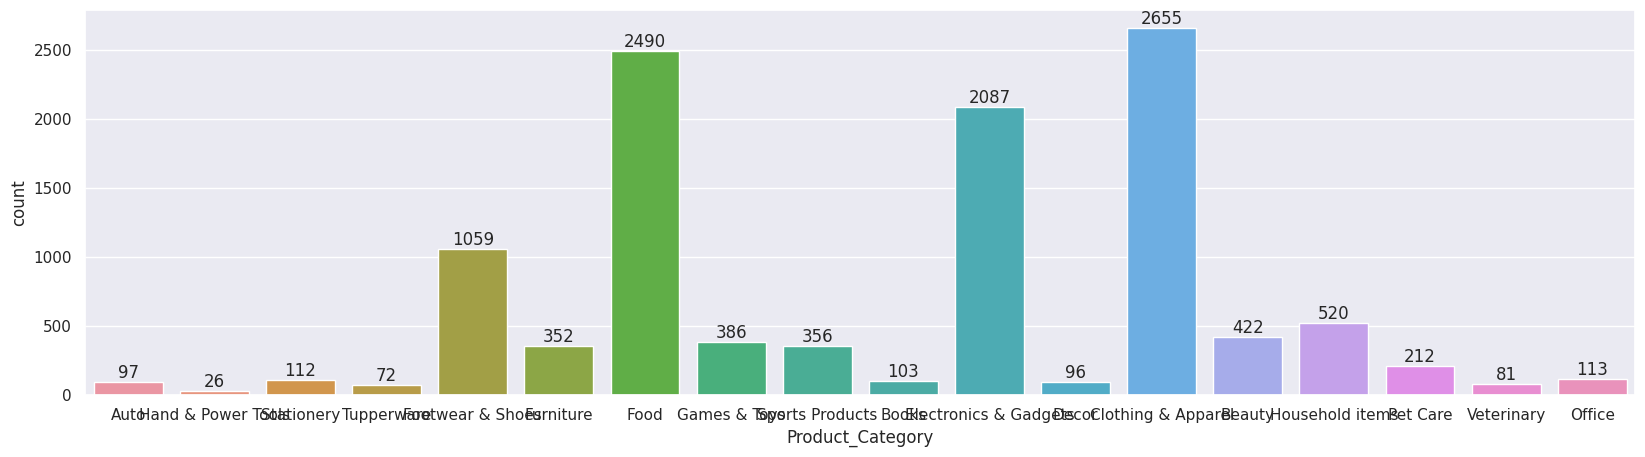

In [ ]:
ax = sns.countplot(x = 'Product_Category', data = df)

sns.set(rc={'figure.figsize': (20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-27-ef4e622863ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_category = df.groupby(['Product_Category'], as_index = False).sum().sort_values(by='Amount', ascending=False)


<Axes: xlabel='Product_Category', ylabel='Amount'>

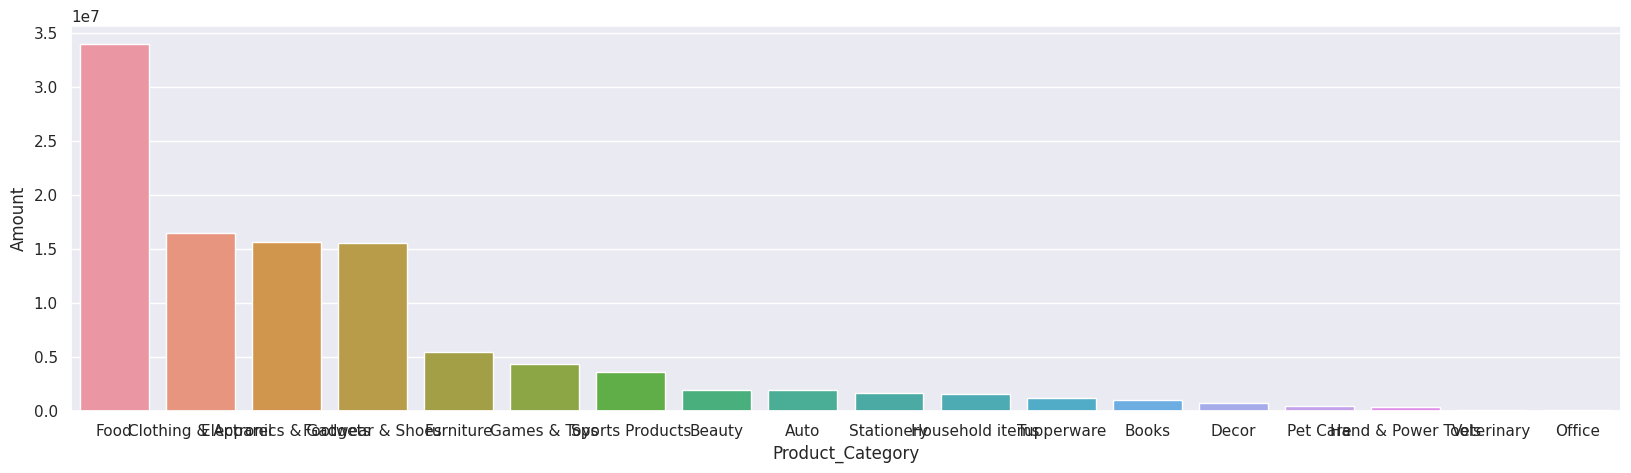

In [ ]:
sales_category = df.groupby(['Product_Category'], as_index = False).sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_category)

**Orders**

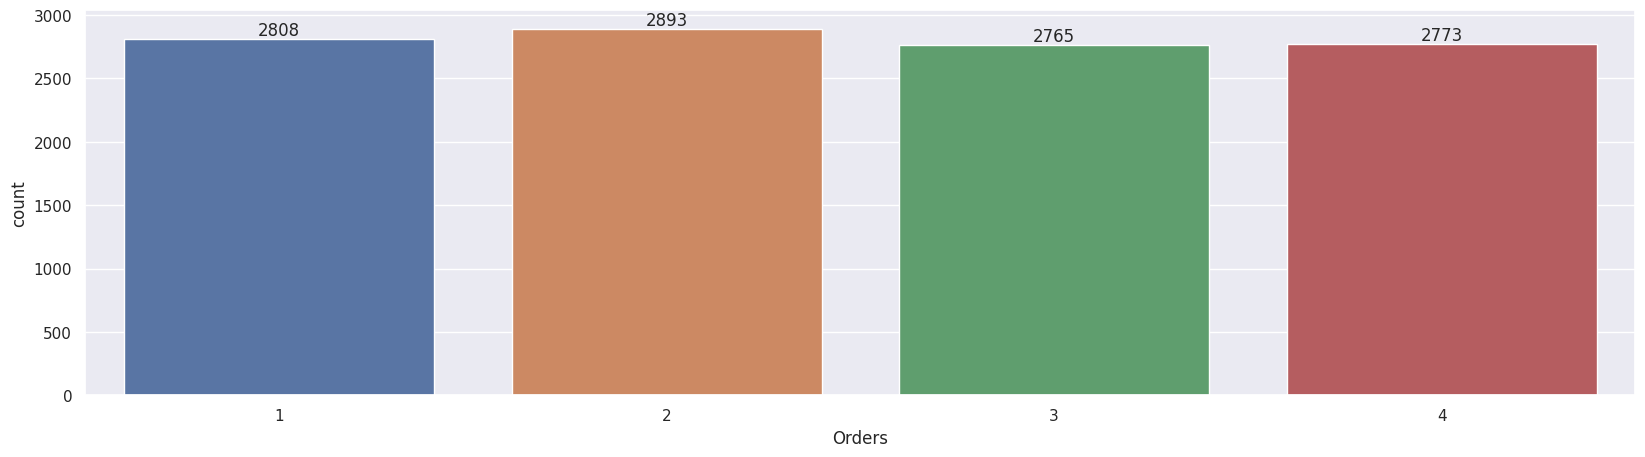

In [ ]:
ax = sns.countplot(x = 'Orders', data = df)

sns.set(rc={'figure.figsize': (5,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_ID', ylabel='Orders'>

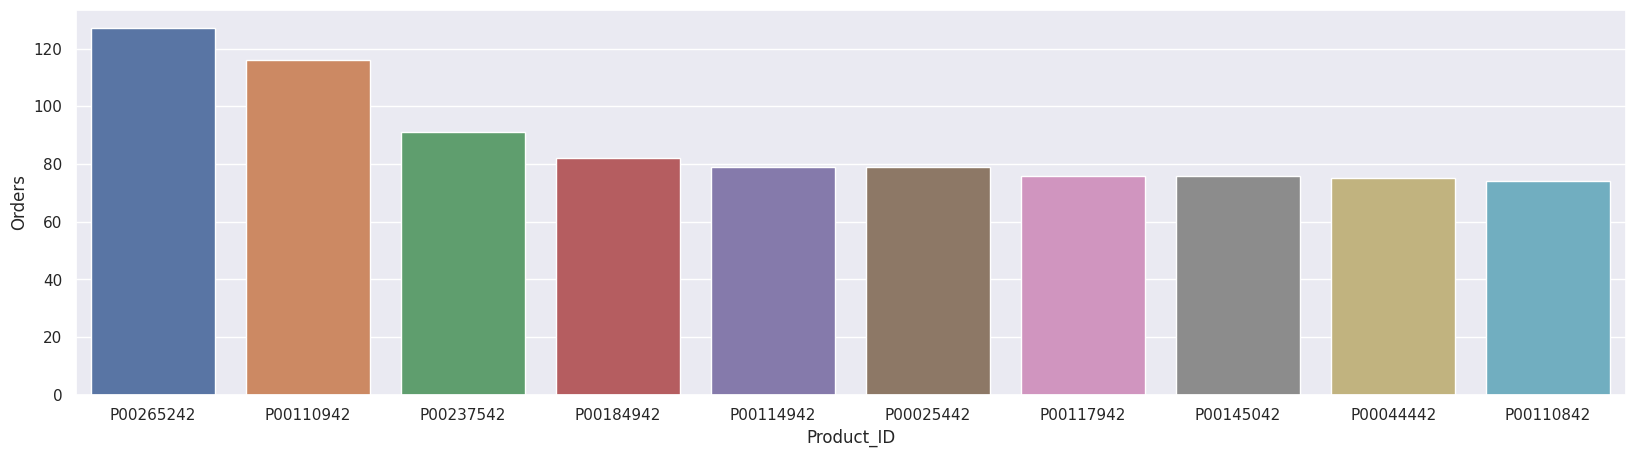

In [ ]:
sales_order = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_order)